In [20]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Path to dataset files:", path)

Path to dataset files: /Users/jeongho/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split


df = pd.read_csv(os.path.join(path, "2019.csv"))

In [22]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [23]:
df = df.drop(["Overall rank", "Country or region"], axis=1)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Score                         156 non-null    float64
 1   GDP per capita                156 non-null    float64
 2   Social support                156 non-null    float64
 3   Healthy life expectancy       156 non-null    float64
 4   Freedom to make life choices  156 non-null    float64
 5   Generosity                    156 non-null    float64
 6   Perceptions of corruption     156 non-null    float64
dtypes: float64(7)
memory usage: 8.7 KB


<Axes: >

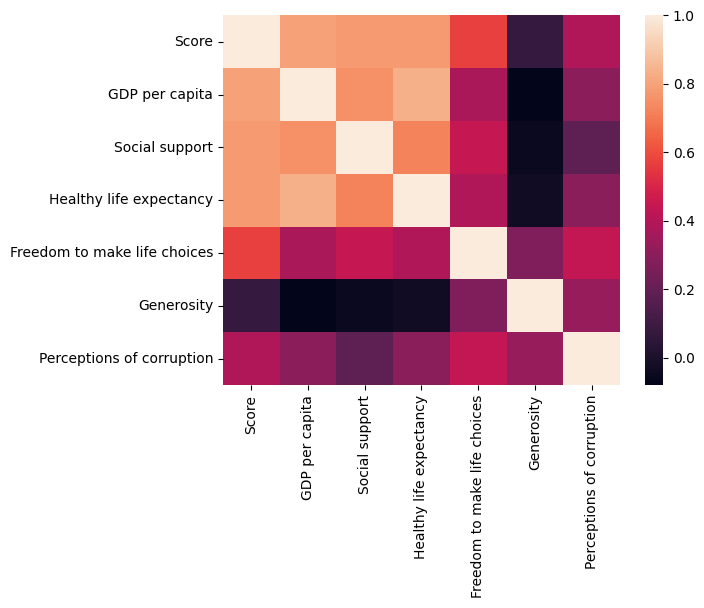

In [25]:
corr = df.corr()

sns.heatmap(corr)

In [26]:
abs(corr["Score"].sort_values(ascending=False))

Score                           1.000000
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64

In [27]:
cor_cols = corr[abs(corr["Score"]) > 0.2].columns

df1 = df[cor_cols]

In [28]:
y = df1["Score"]
X = df1.drop(["Score"], axis=1)

In [29]:
from sklearn.linear_model import LinearRegression

scaler = MinMaxScaler()

scaled_X = scaler.fit_transform(X)


scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)


model = LinearRegression()

In [31]:
model.fit(X_train, y_train)

LinearRegression()

In [32]:
model.score(X_test, y_test)

0.7796496687669131